In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/content/drive/MyDrive/2025-2 MLP/source/WISDM.csv', header=0, names=['index', 'activity', 'timestamp', 'x', 'y', 'z'])
df

,index,activity,timestamp,x,y,z
1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...
1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [3]:
df = df.drop('timestamp', axis=1)
display(df.head())

,index,activity,x,y,z
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164
5,33,Jogging,1.375655,-2.492524,-6.510526


In [4]:
df.shape

(1048574, 5)

In [5]:
df.isnull().sum()

,0
index,0
activity,0
x,0
y,0
z,0


In [6]:
LABELS = ["Jogging", "Sitting"]

In [7]:
df = df[df['activity'].isin(LABELS)]
display(df.head())

,index,activity,x,y,z
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164
5,33,Jogging,1.375655,-2.492524,-6.510526


In [8]:
df.shape

(380850, 5)

/tmp/ipython-input-2274049198.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


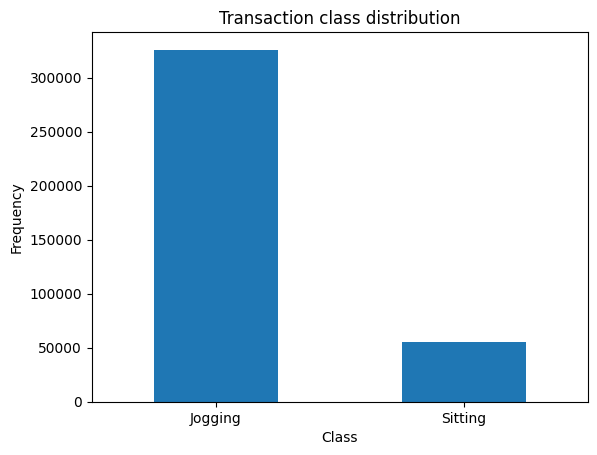

In [9]:
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [10]:
Jogging = df[df.activity == "Jogging"]
Sitting = df[df.activity == "Sitting"]
Jogging.shape

(325974, 5)

In [11]:
Sitting.shape

(54876, 5)

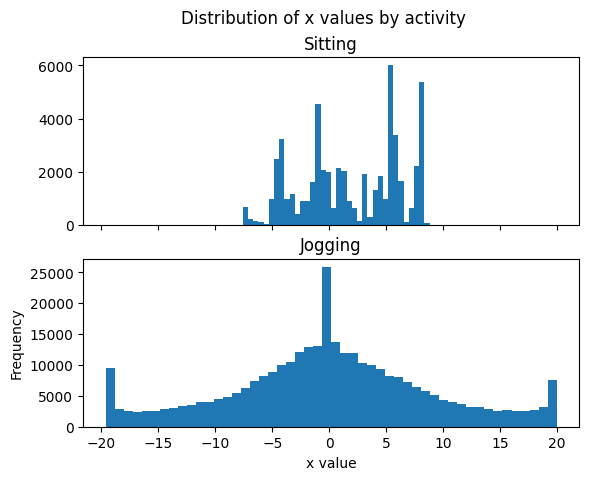

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Distribution of x values by activity')

bins = 50

ax1.hist(Sitting.x, bins = bins)
ax1.set_title('Sitting')

ax2.hist(Jogging.x, bins = bins)
ax2.set_title('Jogging')

plt.xlabel('x value')
plt.ylabel('Frequency')
# plt.xlim((0, 20000)) # This limit might not be appropriate for x values
# plt.yscale('log') # Log scale might not be necessary
plt.show();

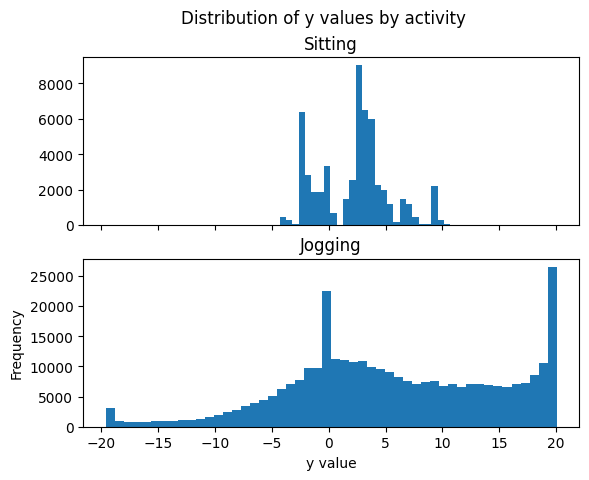

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Distribution of y values by activity')

bins = 50

ax1.hist(Sitting.y, bins = bins)
ax1.set_title('Sitting')

ax2.hist(Jogging.y, bins = bins)
ax2.set_title('Jogging')

plt.xlabel('y value')
plt.ylabel('Frequency')
# plt.xlim((0, 20000)) # This limit might not be appropriate for x values
# plt.yscale('log') # Log scale might not be necessary
plt.show();

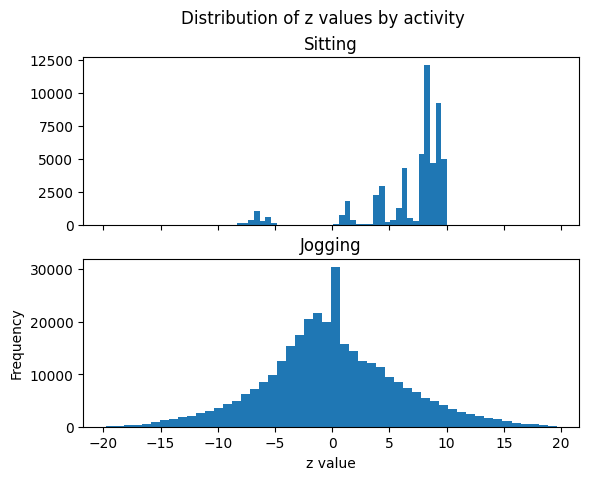

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Distribution of z values by activity')

bins = 50

ax1.hist(Sitting.z, bins = bins)
ax1.set_title('Sitting')

ax2.hist(Jogging.z, bins = bins)
ax2.set_title('Jogging')

plt.xlabel('z value')
plt.ylabel('Frequency')
# plt.xlim((0, 20000)) # This limit might not be appropriate for x values
# plt.yscale('log') # Log scale might not be necessary
plt.show();

In [15]:
from sklearn.preprocessing import StandardScaler

data = df

data['x'] = StandardScaler().fit_transform(data['x'].values.reshape(-1, 1))
data['y'] = StandardScaler().fit_transform(data['y'].values.reshape(-1, 1))
data['z'] = StandardScaler().fit_transform(data['z'].values.reshape(-1, 1))

In [16]:
RANDOM_SEED = 42

In [17]:
data = data.drop(['index'], axis=1)

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.activity == "Jogging"]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(260819, 3)

In [18]:
input_dim = X_train.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
encoded = Dense(7, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(7, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [19]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8440 - val_loss: 0.6085
Epoch 2/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5716 - val_loss: 0.5006
Epoch 3/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4948 - val_loss: 0.4705
Epoch 4/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4640 - val_loss: 0.4433
Epoch 5/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4385 - val_loss: 0.4043
Epoch 6/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3160 - val_loss: 0.1701
Epoch 7/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1674 - val_loss: 0.1571
Epoch 8/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1570 - val_loss: 0.1490
Epoch 9/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1477 - val_loss: 0.1415
Epoch 10/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1427 - val_loss: 0.1357
Epoch 11/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1365 - val_loss: 0.1328
Epoch 12/50
917/917 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

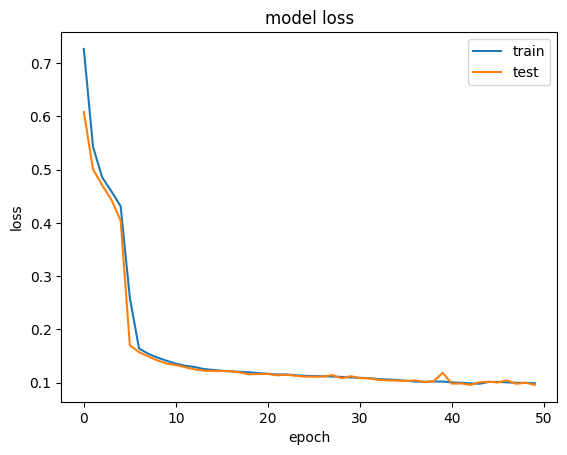

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [21]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


,reconstruction_error
count,76170.000000
mean,0.095589
std,0.194381
min,0.000003
25%,0.012944
50%,0.043271
75%,0.112964
max,5.266964


In [22]:
error_df.head()

,reconstruction_error,true_class
469047,0.061652,Sitting
169578,0.009954,Jogging
639905,0.019473,Sitting
962558,0.413677,Jogging
546412,0.024910,Jogging


In [23]:
import numpy as np

normal_errors = error_df[error_df['true_class'] == 'Jogging']['reconstruction_error']

threshold = np.percentile(normal_errors, 95)

print(f"새로운 임계값 (정상 데이터의 95% 지점): {threshold}")

새로운 임계값 (정상 데이터의 95% 지점): 0.3296367496863316


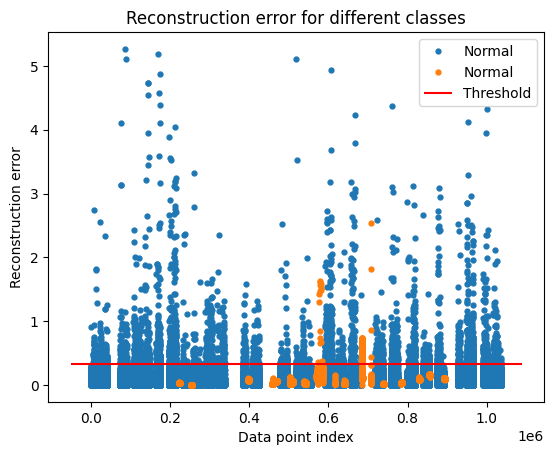

In [24]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

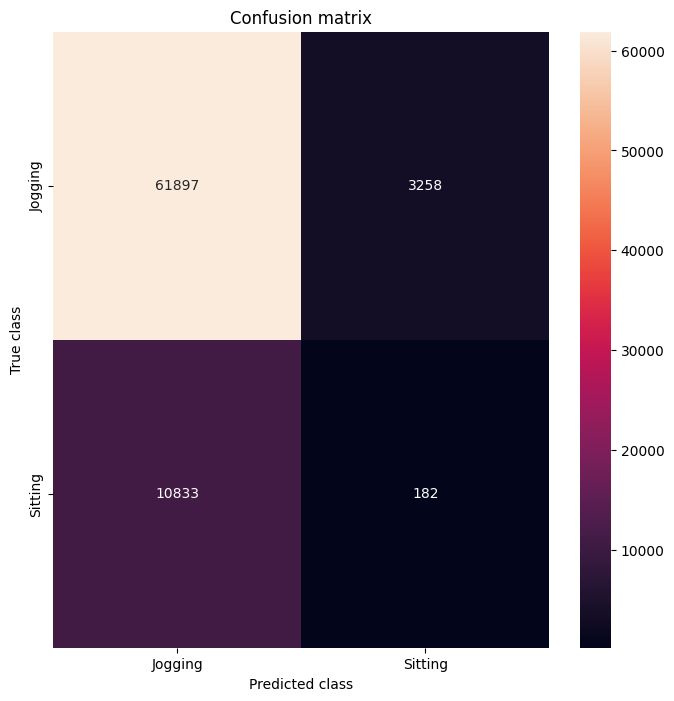

              precision    recall  f1-score   support

     Jogging       0.85      0.95      0.90     65155
     Sitting       0.05      0.02      0.03     11015

    accuracy                           0.82     76170
   macro avg       0.45      0.48      0.46     76170
weighted avg       0.74      0.82      0.77     76170



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Map string labels to integers to match the predicted labels
error_df['true_class_numeric'] = error_df['true_class'].apply(lambda x: 0 if x == 'Jogging' else 1)

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class_numeric, y_pred) # Use the numeric true labels
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Also use the numeric true labels for the classification report
print(classification_report(error_df.true_class_numeric, y_pred, target_names=LABELS))